In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:,.2f}'.format

# print every command of cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_camaccess = pd.read_csv("camaccess.csv")

In [3]:
df_camaccess.info()
df_camaccess.shape
df_camaccess.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"1,890,289.69","1,867,964.06","2,918.62","4,232,288.26","2,364,324.21",5.57,2.49,1.27,...,"7,947,203.35","2,517,944.39","3,720,305.73","192,042.74","288,064.10",48.47,"1,136.76",14.02,0.25,0.55
std,15.44,15.44,"882,742.74","873,938.61","1,525.09","2,151,578.69","1,308,609.03",0.91,0.54,0.68,...,"4,051,771.35","1,241,413.72","3,512,725.33","357,536.45","517,190.32",7.80,176.96,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"1,629,776.00","1,603,351.00","2,167.00","3,403,457.00","1,745,374.00",5.46,2.36,1.02,...,"4,787,285.21","1,592,336.12","2,146,059.69",0.00,0.00,46.93,"1,065.86",6.00,0.00,0.00
50%,26.00,53.00,"1,949,101.00","1,923,468.00","2,915.00","4,152,990.00","2,280,704.00",5.67,2.55,1.18,...,"9,670,232.97","3,076,240.41","2,559,407.38",0.00,0.00,48.79,"1,194.00",13.00,0.00,0.00
75%,39.00,66.00,"2,287,578.00","2,265,046.00","3,941.00","5,372,808.00","3,078,954.00",5.83,2.71,1.44,...,"11,075,114.41","3,359,844.47","3,400,723.06","305,833.06","412,464.52",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"4,872,689.97","4,823,257.47","7,307.00","10,992,699.00","6,169,441.53",8.00,4.00,5.66,...,"11,994,452.49","3,627,109.84","15,712,724.16","1,328,791.94","1,993,187.90",59.99,"1,242.00",30.00,3.00,7.00


In [4]:
df_camaccess = df_camaccess.loc[:, ~df_camaccess.columns.str.contains('^Unnamed')]
df_camaccess.head()
df_camaccess.shape
df_camaccess = df_camaccess.dropna()
df_camaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"540,907.28","224,934.98","2,237,080.25",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

<Figure size 1440x1080 with 0 Axes>

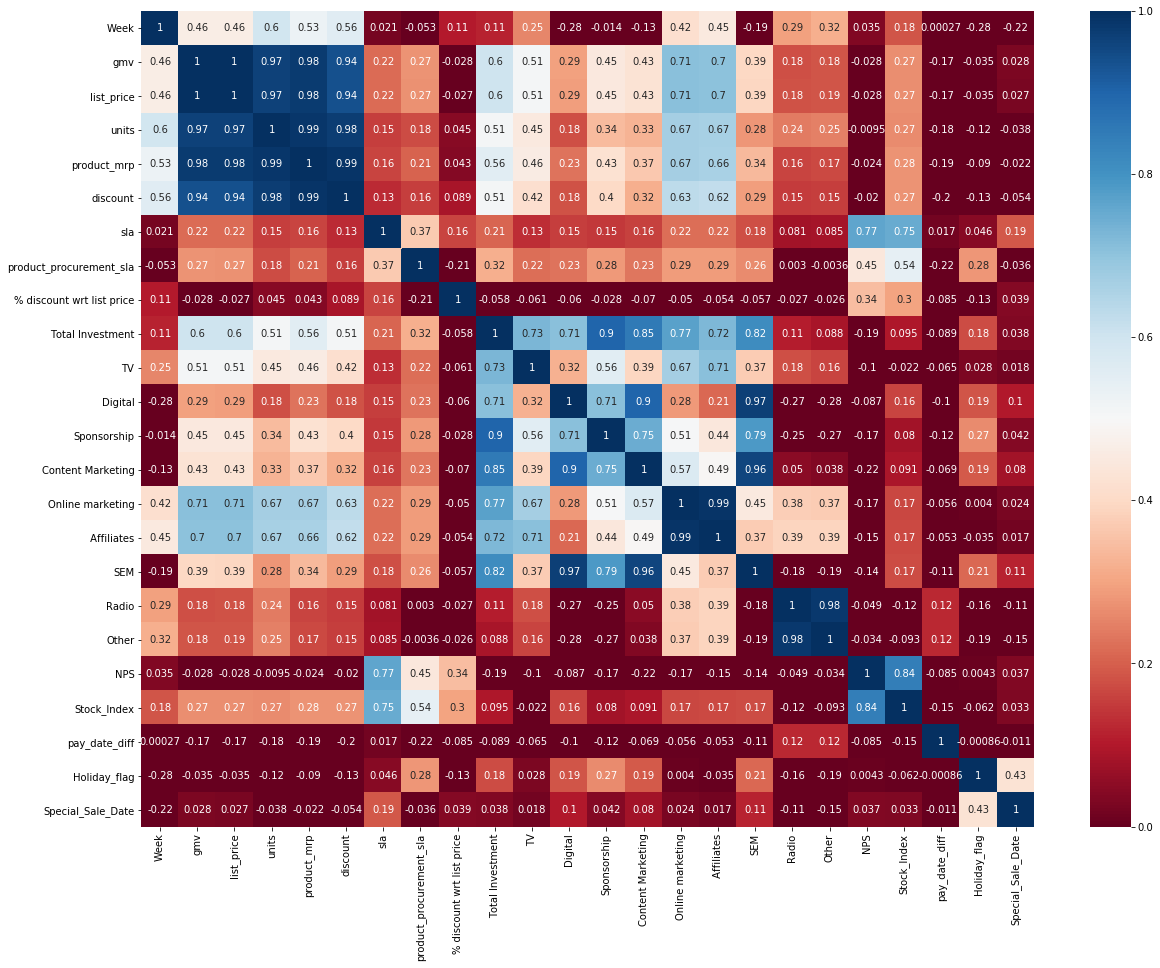

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df_camaccess.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [6]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [7]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_camaccess.columns)
##num_vars.remove('gmv')
num_vars
df_camaccess[num_vars] = scaler.fit_transform(df_camaccess[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [8]:
df_camaccess.shape

(53, 24)

In [9]:
df_camaccess.head()
df_camaccess.describe()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.75,0.16,0.05,...,0.03,0.04,0.07,0.00,0.00,0.91,0.95,0.33,0.33,0.00
1,0.02,0.25,0.25,0.20,0.21,0.17,0.73,0.63,0.15,0.09,...,0.05,0.07,0.14,0.00,0.00,0.91,0.95,0.10,0.00,0.00
2,0.04,0.31,0.31,0.25,0.26,0.22,0.72,0.64,0.16,0.10,...,0.05,0.07,0.16,0.00,0.00,0.91,0.95,0.60,0.00,0.29
3,0.06,0.30,0.30,0.25,0.26,0.23,0.73,0.66,0.17,0.10,...,0.05,0.07,0.16,0.00,0.00,0.91,0.95,0.83,0.00,0.00
4,0.08,0.20,0.20,0.16,0.17,0.15,0.74,0.65,0.17,0.09,...,0.05,0.06,0.14,0.00,0.00,0.94,0.95,0.43,0.33,0.00


,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,0.50,0.39,0.39,0.40,0.39,0.38,0.70,0.62,0.23,0.41,...,0.66,0.69,0.24,0.14,0.14,0.81,0.92,0.47,0.08,0.08
std,0.30,0.18,0.18,0.21,0.20,0.21,0.11,0.13,0.12,0.24,...,0.34,0.34,0.22,0.27,0.26,0.13,0.14,0.31,0.20,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.33,0.33,0.30,0.31,0.28,0.68,0.59,0.18,0.30,...,0.40,0.44,0.14,0.00,0.00,0.78,0.86,0.20,0.00,0.00
50%,0.50,0.40,0.40,0.40,0.38,0.37,0.71,0.64,0.21,0.43,...,0.81,0.85,0.16,0.00,0.00,0.81,0.96,0.43,0.00,0.00
75%,0.75,0.47,0.47,0.54,0.49,0.50,0.73,0.68,0.25,0.57,...,0.92,0.93,0.22,0.23,0.21,0.84,0.98,0.73,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
y_train = df_camaccess.pop('gmv')
X_train = df_camaccess

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                       -0.00
Week                         0.00
list_price                   0.87
units                        0.01
product_mrp                  0.29
discount                    -0.17
sla                          0.01
product_procurement_sla      0.01
% discount wrt list price    0.00
Total Investment             0.16
TV                          -0.02
Digital                     -0.04
Sponsorship                 -0.08
Content Marketing           -0.01
Online marketing            -0.03
 Affiliates                 -0.00
SEM                          0.00
Radio                       -0.03
Other                        0.00
NPS                         -0.02
Stock_Index                  0.00
pay_date_diff                0.00
Holiday_flag                -0.00
Special_Sale_Date            0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.928e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.81e-67
Time:                        22:10:06   Log-Likelihood:                 312.53
No. Observations:                  53   AIC:                            -579.1
Df Residuals:                      30   BIC:                            -533.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0003      0.001     -0.273      0.787      -0.002       0.002
Week                          0.0012      0.001      1.430      0.163      -0.001       0.003
list_price                    0.8663      0.005    191.438      0.000       0.857       0.876
units                         0.0108      0.007      1.612      0.117      -0.003       0.025
product_mrp                   0.2870      0.002    126.079      0.000       0.282       0.292
discount                     -0.1659      0.003    -48.342      0.000      -0.173      -0.159
sla                           0.0092      0.005      2.004      0.054      -0.000       0.019
product_procurement_sla       0.0058      0.003      2.024      0.052    -5.3e-05       0.012
% discount wrt list price     0.0026      0.002      1.440      0.160      -0.001       0.006
Total Investment              0.1580      0.098      1.612      0.117      -0.042       0.358
TV                           -0.0168      0.010     -1.599      0.120      -0.038       0.005
Digital                      -0.0367      0.028     -1.334      0.192      -0.093       0.019
Sponsorship                  -0.0802      0.050     -1.616      0.117      -0.182       0.021
Content Marketing            -0.0063      0.007     -0.888      0.381      -0.021       0.008
Online marketing             -0.0275      0.018     -1.546      0.133      -0.064       0.009
 Affiliates                  -0.0021      0.013     -0.156      0.877      -0.029       0.025
SEM                           0.0033      0.010      0.336      0.739      -0.017       0.023
Radio                        -0.0323      0.018     -1.821      0.079      -0.069       0.004
Other                         0.0031      0.003      1.071      0.293      -0.003       0.009
NPS                          -0.0151      0.007     -2.112      0.043      -0.030      -0.001
Stock_Index                   0.0043      0.006      0.747      0.461      -0.008       0.016
pay_date_diff                 0.0002      0.000      0.357      0.724      -0.001       0.001
Holiday_flag                 -0.0006      0.001     -0.559      0.580      -0.003       0.001
Special_Sale_Date          2.939e-05      0.001      0.036      0.971      -0.002       0.002
==============================================================================
Omnibus:                        2.447   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.617
Skew:                          -0.200   Prob(JB):                        0.446
Kurtosis:                       3.756   Cond. No.                     5.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [11]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,list_price,inf
3,product_mrp,inf
4,discount,inf
8,Total Investment,"148,527.96"
11,Sponsorship,"34,425.47"
13,Online marketing,"11,836.42"
14,Affiliates,"7,086.31"
10,Digital,"4,590.21"
18,NPS,"2,322.13"
16,Radio,"1,950.55"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 5),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', False, 2),
 ('% discount wrt list price', False, 3),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', False, 6),
 ('SEM', False, 4),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('NPS', True, 1),
 ('Stock_Index', True, 1),
 ('pay_date_diff', False, 8),
 ('Holiday_flag', False, 7),
 ('Special_Sale_Date', False, 9)]

Index(['list_price', 'units', 'product_mrp', 'discount', 'sla',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Radio', 'Other', 'NPS', 'Stock_Index'],
      dtype='object')

Index(['Week', 'product_procurement_sla', '% discount wrt list price',
       ' Affiliates', 'SEM', 'pay_date_diff', 'Holiday_flag',
       'Special_Sale_Date'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [14]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.623e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.11e-86
Time:                        22:10:06   Log-Likelihood:                 307.31
No. Observations:                  53   AIC:                            -584.6
Df Residuals:                      38   BIC:                            -555.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.503e-05      0.00

,Features,VIF
1,list_price,inf
3,product_mrp,inf
4,discount,inf
6,Total Investment,"14,622.54"
9,Sponsorship,"4,916.12"
11,Online marketing,909.00
8,Digital,732.07
12,Radio,565.90
7,TV,252.25
10,Content Marketing,145.72


In [15]:
# Drop variable
X_train_new = X_train_rfe.drop(["list_price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.623e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.11e-86
Time:                        22:10:07   Log-Likelihood:                 307.31
No. Observations:                  53   AIC:                            -584.6
Df Residuals:                      38   BIC:                            -555.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.503e-05      0.00

,Features,VIF
5,Total Investment,"14,622.54"
8,Sponsorship,"4,916.12"
10,Online marketing,909.00
7,Digital,732.07
11,Radio,565.90
6,TV,252.25
2,product_mrp,190.12
9,Content Marketing,145.72
3,discount,109.18
1,units,68.14


In [16]:
# Drop variable
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.311e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.24e-86
Time:                        22:10:07   Log-Likelihood:                 298.99
No. Observations:                  53   AIC:                            -570.0
Df Residuals:                      39   BIC:                            -542.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0003      0.00

,Features,VIF
2,product_mrp,163.33
8,Content Marketing,128.28
6,Digital,96.78
3,discount,92.50
1,units,65.62
0,const,52.08
9,Online marketing,34.91
10,Radio,34.32
11,Other,31.41
13,Stock_Index,20.09


In [17]:
# Drop variable
X_train_new = X_train_new.drop(["product_mrp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     86.59
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.07e-24
Time:                        22:10:07   Log-Likelihood:                 103.16
No. Observations:                  53   AIC:                            -180.3
Df Residuals:                      40   BIC:                            -154.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0194      0.03

,Features,VIF
7,Content Marketing,125.33
5,Digital,93.74
0,const,51.78
1,units,39.99
2,discount,38.18
9,Radio,34.31
8,Online marketing,34.15
10,Other,31.41
12,Stock_Index,19.94
11,NPS,19.61


In [18]:
# Drop variable
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     94.43
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.71e-25
Time:                        22:10:07   Log-Likelihood:                 102.52
No. Observations:                  53   AIC:                            -181.0
Df Residuals:                      41   BIC:                            -157.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0214      0.039  

,Features,VIF
0,const,51.63
1,units,37.58
2,discount,37.19
8,Radio,31.31
9,Other,31.01
10,NPS,17.55
11,Stock_Index,14.66
7,Online marketing,8.68
6,Sponsorship,4.82
3,sla,4.28


In [19]:
# Drop variable
X_train_new = X_train_new.drop(['units'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     59.25
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.68e-21
Time:                        22:10:07   Log-Likelihood:                 87.797
No. Observations:                  53   AIC:                            -153.6
Df Residuals:                      42   BIC:                            -131.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0269      0.051  

,Features,VIF
0,const,51.60
7,Radio,31.23
8,Other,30.82
9,NPS,17.23
10,Stock_Index,14.10
6,Online marketing,8.21
2,sla,4.24
5,Sponsorship,3.78
3,TV,3.52
4,Digital,2.55


In [20]:
# Drop variable
X_train_new = X_train_new.drop(["Radio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     67.12
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.15e-22
Time:                        22:10:07   Log-Likelihood:                 87.693
No. Observations:                  53   AIC:                            -155.4
Df Residuals:                      43   BIC:                            -135.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0258      0.051  

,Features,VIF
0,const,51.45
8,NPS,16.82
9,Stock_Index,13.41
6,Online marketing,8.06
2,sla,4.24
5,Sponsorship,3.77
3,TV,3.49
4,Digital,2.55
7,Other,2.29
1,discount,2.04


In [21]:
# Drop variable
X_train_new = X_train_new.drop(["NPS"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     77.10
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.46e-23
Time:                        22:10:07   Log-Likelihood:                 87.640
No. Observations:                  53   AIC:                            -157.3
Df Residuals:                      44   BIC:                            -139.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0234      0.049  

,Features,VIF
0,const,50.15
5,Sponsorship,3.77
6,Online marketing,3.44
8,Stock_Index,3.30
2,sla,2.91
3,TV,2.19
4,Digital,2.18
1,discount,2.01
7,Other,2.01


In [22]:
# Drop variable
X_train_new = X_train_new.drop(["Other"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     88.92
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.27e-24
Time:                        22:10:08   Log-Likelihood:                 87.310
No. Observations:                  53   AIC:                            -158.6
Df Residuals:                      45   BIC:                            -142.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0188      0.049  

,Features,VIF
0,const,49.37
5,Sponsorship,2.92
7,Stock_Index,2.90
2,sla,2.65
6,Online marketing,2.60
3,TV,2.19
4,Digital,2.18
1,discount,1.99


In [23]:
# Drop variable
X_train_new = X_train_new.drop(["TV"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     103.7
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.86e-25
Time:                        22:10:08   Log-Likelihood:                 86.761
No. Observations:                  53   AIC:                            -159.5
Df Residuals:                      46   BIC:                            -145.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0258      0.048  

,Features,VIF
0,const,48.29
4,Sponsorship,2.74
6,Stock_Index,2.74
2,sla,2.59
3,Digital,2.18
5,Online marketing,2.02
1,discount,1.99


In [24]:
# Drop variable
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     118.2
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.01e-25
Time:                        22:10:08   Log-Likelihood:                 84.953
No. Observations:                  53   AIC:                            -157.9
Df Residuals:                      47   BIC:                            -146.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0153      0.049  

,Features,VIF
0,const,47.58
5,Stock_Index,2.62
2,sla,2.53
1,discount,1.89
4,Online marketing,1.89
3,Digital,1.10


In [25]:
# Drop variable
X_train_new = X_train_new.drop(['Stock_Index'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.39e-26
Time:                        22:10:08   Log-Likelihood:                 82.941
No. Observations:                  53   AIC:                            -155.9
Df Residuals:                      48   BIC:                            -146.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0217      0.046  

,Features,VIF
0,const,40.26
4,Online marketing,1.79
1,discount,1.66
3,Digital,1.10
2,sla,1.06


In [26]:
# Drop variable
X_train_new = X_train_new.drop(["sla"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     179.0
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.16e-26
Time:                        22:10:08   Log-Likelihood:                 81.600
No. Observations:                  53   AIC:                            -155.2
Df Residuals:                      49   BIC:                            -147.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0462      0.017  

,Features,VIF
0,const,5.56
3,Online marketing,1.74
1,discount,1.66
2,Digital,1.09


In [27]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [28]:
X_train_new.columns

Index(['discount', 'Digital', 'Online marketing'], dtype='object')

In [29]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

[' Affiliates', 'SEM', 'Holiday_flag', 'product_mrp', 'Week', 'Total Investment', 'units', 'NPS', '% discount wrt list price', 'Content Marketing', 'list_price', 'Special_Sale_Date', 'sla', 'Other', 'pay_date_diff', 'TV', 'product_procurement_sla', 'Sponsorship', 'gmv', 'Stock_Index', 'Radio']


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([ 0.94647097,  0.92795504,  0.91686638,  0.97425044, -2.00948404,
        0.94559552,  0.3858727 ,  0.65553086,  0.87577529,  0.92481895])

In [31]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [32]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.003530849596880119
r_square_value : 0.8903468791504938


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

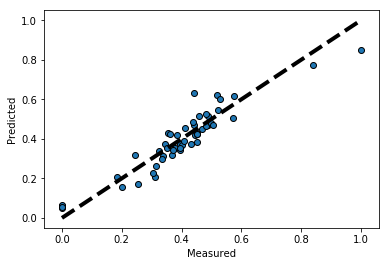

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Koyck Model

In [34]:
df_camaccess = pd.read_csv("camaccess.csv")

In [35]:
df_camaccess.head()

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,...,"540,907.28","224,934.98","2,237,080.25",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


In [36]:
df_camaccess = df_camaccess.loc[:, ~df_camaccess.columns.str.contains('^Unnamed')]
df_camaccess.head()
df_camaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"540,907.28","224,934.98","2,237,080.25",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

In [37]:
df_camaccess.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

In [38]:
#Lag variable on Gmv
df_camaccess['gmv_lag_1']=df_camaccess['gmv'].shift(1)
df_camaccess['gmv_lag_1']=df_camaccess['gmv_lag_1'].fillna(df_camaccess['gmv'].mean())

In [39]:
# Moving averages on Pricing & Promotional Offer Related KPIs
df_camaccess['LP_MA_3']=df_camaccess.list_price.rolling(window=3).mean()
df_camaccess['LP_MA_5']=df_camaccess.list_price.rolling(window=5).mean()
df_camaccess['DISC_MA_3']=df_camaccess.discount.rolling(window=3).mean()
df_camaccess['DISC_MA_5']=df_camaccess.discount.rolling(window=5).mean()
df_camaccess['PM_MA_3']=df_camaccess.product_mrp.rolling(window=3).mean()
df_camaccess['PM_MA_5']=df_camaccess.product_mrp.rolling(window=5).mean()

In [40]:
df_camaccess['LP_MA_3']=df_camaccess['LP_MA_3'].fillna(df_camaccess['LP_MA_3'].mean())
df_camaccess['LP_MA_5']=df_camaccess['LP_MA_5'].fillna(df_camaccess['LP_MA_5'].mean())
df_camaccess['DISC_MA_3']=df_camaccess['DISC_MA_3'].fillna(df_camaccess['DISC_MA_3'].mean())
df_camaccess['DISC_MA_5']=df_camaccess['DISC_MA_5'].fillna(df_camaccess['DISC_MA_5'].mean()) 
df_camaccess['PM_MA_3']=df_camaccess['PM_MA_3'].fillna(df_camaccess['PM_MA_3'].mean())
df_camaccess['PM_MA_5']=df_camaccess['PM_MA_5'].fillna(df_camaccess['PM_MA_5'].mean()) 

In [41]:
# as Moving averages are used Respective columns will be dropped
df_camaccess=df_camaccess.drop('list_price',axis=1)
df_camaccess=df_camaccess.drop('discount',axis=1)
df_camaccess=df_camaccess.drop('product_mrp',axis=1)

In [42]:
df_camaccess.head()

,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
0,27,"1,544.00",2.00,4.50,3.00,0.91,"3,998,509.63","50,463.68","593,624.02","1,737,569.99",...,10,1.00,0.00,"1,890,289.69","1,911,171.72","1,928,243.15","2,423,277.84","2,449,473.14","4,334,449.56","4,377,716.29"
1,28,"1,237,541.00","1,496.00",5.83,2.53,0.87,"7,597,168.30","95,880.98","1,127,885.64","3,301,382.98",...,3,0.00,0.00,"1,544.00","1,911,171.72","1,928,243.15","2,423,277.84","2,449,473.14","4,334,449.56","4,377,716.29"
2,29,"1,519,243.00","1,794.00",5.75,2.58,0.92,"8,396,870.23","105,973.72","1,246,610.44","3,648,896.97",...,18,0.00,2.00,"1,237,541.00","908,799.00","1,928,243.15","815,456.67","2,449,473.14","1,724,255.67","4,377,716.29"
3,30,"1,479,823.00","1,850.00",5.83,2.64,0.98,"8,396,870.23","105,973.72","1,246,610.44","3,648,896.97",...,25,0.00,0.00,"1,519,243.00","1,395,699.67","1,928,243.15","1,291,137.33","2,449,473.14","2,686,837.00","4,377,716.29"
4,31,"978,782.00","1,198.00",5.92,2.61,0.93,"7,272,204.23","86,391.77","1,128,969.93","3,053,547.76",...,13,1.00,0.00,"1,479,823.00","1,309,486.67","1,030,869.80","1,236,634.67","955,376.60","2,546,121.33","1,986,246.40"


In [43]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [44]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_camaccess.columns)
##num_vars.remove('gmv')
num_vars
df_camaccess[num_vars] = scaler.fit_transform(df_camaccess[num_vars])

['Week',
 'gmv',
 'units',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date',
 'gmv_lag_1',
 'LP_MA_3',
 'LP_MA_5',
 'DISC_MA_3',
 'DISC_MA_5',
 'PM_MA_3',
 'PM_MA_5']

In [45]:
df_camaccess.shape

(53, 28)

In [46]:
df_camaccess.head()
df_camaccess.describe()

,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
0,0.00,0.00,0.00,0.56,0.75,0.16,0.05,0.01,0.10,0.04,...,0.33,0.33,0.00,0.39,0.63,0.66,0.51,0.54,0.56,0.58
1,0.02,0.25,0.20,0.73,0.63,0.15,0.09,0.02,0.18,0.08,...,0.10,0.00,0.00,0.00,0.63,0.66,0.51,0.54,0.56,0.58
2,0.04,0.31,0.25,0.72,0.64,0.16,0.10,0.02,0.20,0.09,...,0.60,0.00,0.29,0.25,0.30,0.66,0.17,0.54,0.22,0.58
3,0.06,0.30,0.25,0.73,0.66,0.17,0.10,0.02,0.20,0.09,...,0.83,0.00,0.00,0.31,0.46,0.66,0.27,0.54,0.34,0.58
4,0.08,0.20,0.16,0.74,0.65,0.17,0.09,0.02,0.18,0.07,...,0.43,0.33,0.00,0.30,0.43,0.32,0.26,0.18,0.33,0.24


,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,0.50,0.39,0.40,0.70,0.62,0.23,0.41,0.40,0.19,0.36,...,0.47,0.08,0.08,0.39,0.63,0.66,0.51,0.54,0.56,0.58
std,0.30,0.18,0.21,0.11,0.13,0.12,0.24,0.27,0.23,0.28,...,0.31,0.20,0.21,0.18,0.22,0.23,0.22,0.23,0.22,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.33,0.30,0.68,0.59,0.18,0.30,0.17,0.09,0.15,...,0.20,0.00,0.00,0.34,0.58,0.63,0.42,0.47,0.48,0.54
50%,0.50,0.40,0.40,0.71,0.64,0.21,0.43,0.47,0.12,0.31,...,0.43,0.00,0.00,0.40,0.66,0.69,0.50,0.54,0.56,0.58
75%,0.75,0.47,0.54,0.73,0.68,0.25,0.57,0.58,0.18,0.49,...,0.73,0.00,0.00,0.47,0.77,0.80,0.65,0.69,0.69,0.73
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [47]:
y_train = df_camaccess.pop('gmv')
X_train = df_camaccess

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                       -0.01
Week                        -0.01
units                        0.85
sla                          0.29
product_procurement_sla      0.13
% discount wrt list price    0.03
Total Investment            -3.15
TV                           0.22
Digital                      1.04
Sponsorship                  1.72
Content Marketing           -0.30
Online marketing             0.30
 Affiliates                  0.34
SEM                          0.06
Radio                        0.63
Other                        0.01
NPS                         -0.32
Stock_Index                 -0.02
pay_date_diff                0.01
Holiday_flag                 0.03
Special_Sale_Date           -0.01
gmv_lag_1                   -0.11
LP_MA_3                      0.13
LP_MA_5                      0.14
DISC_MA_3                   -0.18
DISC_MA_5                   -0.09
PM_MA_3                     -0.06
PM_MA_5                     -0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     96.70
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.67e-20
Time:                        22:10:12   Log-Likelihood:                 135.25
No. Observations:                  53   AIC:                            -218.5
Df Residuals:                      27   BIC:                            -167.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0092      0.031     -0.297      0.768      -0.073       0.054
Week                         -0.0095      0.037     -0.258      0.798      -0.085       0.066
units                         0.8466      0.043     19.668      0.000       0.758       0.935
sla                           0.2902      0.150      1.936      0.063      -0.017       0.598
product_procurement_sla       0.1285      0.090      1.432      0.164      -0.056       0.313
% discount wrt list price     0.0308      0.056      0.550      0.587      -0.084       0.145
Total Investment             -3.1481      3.332     -0.945      0.353      -9.985       3.689
TV                            0.2233      0.365      0.612      0.546      -0.525       0.972
Digital                       1.0383      0.882      1.177      0.250      -0.772       2.849
Sponsorship                   1.7174      1.702      1.009      0.322      -1.774       5.209
Content Marketing            -0.3048      0.274     -1.115      0.275      -0.866       0.256
Online marketing              0.3040      0.643      0.473      0.640      -1.014       1.622
 Affiliates                   0.3356      0.443      0.757      0.456      -0.574       1.245
SEM                           0.0575      0.300      0.191      0.850      -0.559       0.673
Radio                         0.6281      0.603      1.041      0.307      -0.610       1.866
Other                         0.0058      0.088      0.066      0.948      -0.176       0.187
NPS                          -0.3159      0.234     -1.351      0.188      -0.796       0.164
Stock_Index                  -0.0243      0.196     -0.124      0.902      -0.427       0.378
pay_date_diff                 0.0090      0.013      0.671      0.508      -0.019       0.037
Holiday_flag                  0.0344      0.032      1.079      0.290      -0.031       0.100
Special_Sale_Date            -0.0134      0.027     -0.500      0.621      -0.069       0.042
gmv_lag_1                    -0.1071      0.039     -2.717      0.011      -0.188      -0.026
LP_MA_3                       0.1317      0.161      0.818      0.421      -0.199       0.462
LP_MA_5                       0.1387      0.290      0.479      0.636      -0.455       0.733
DISC_MA_3                    -0.1755      0.139     -1.260      0.219      -0.461       0.110
DISC_MA_5                    -0.0895      0.259     -0.346      0.732      -0.620       0.441
PM_MA_3                      -0.0564      0.032     -1.772      0.088      -0.122       0.009
PM_MA_5                      -0.0013      0.053     -0.025      0.980      -0.109       0.107
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.988
Prob(Omnibu

In [48]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,PM_MA_5,inf
24,DISC_MA_5,inf
22,LP_MA_5,inf
25,PM_MA_3,"3,046,059,944,112.61"
23,DISC_MA_3,"979,469,253,451.61"
21,LP_MA_3,"577,643,766,737.70"
5,Total Investment,"48,651.59"
8,Sponsorship,"17,154.57"
10,Online marketing,"3,508.95"
7,Digital,"3,092.95"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 10),
 ('units', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('% discount wrt list price', False, 6),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', False, 7),
 ('Radio', True, 1),
 ('Other', False, 12),
 ('NPS', True, 1),
 ('Stock_Index', False, 9),
 ('pay_date_diff', False, 11),
 ('Holiday_flag', False, 5),
 ('Special_Sale_Date', False, 8),
 ('gmv_lag_1', False, 2),
 ('LP_MA_3', False, 3),
 ('LP_MA_5', True, 1),
 ('DISC_MA_3', True, 1),
 ('DISC_MA_5', True, 1),
 ('PM_MA_3', False, 4),
 ('PM_MA_5', False, 13)]

Index(['units', 'sla', 'product_procurement_sla', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       ' Affiliates', 'Radio', 'NPS', 'LP_MA_5', 'DISC_MA_3', 'DISC_MA_5'],
      dtype='object')

Index(['Week', '% discount wrt list price', 'SEM', 'Other', 'Stock_Index',
       'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date', 'gmv_lag_1',
       'LP_MA_3', 'PM_MA_3', 'PM_MA_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.09e-29
Time:                        22:10:13   Log-Likelihood:                 126.61
No. Observations:                  53   AIC:                            -221.2
Df Residuals:                      37   BIC:                            -189.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,Total Investment,"25,562.15"
7,Sponsorship,"8,968.09"
9,Online marketing,"1,465.10"
6,Digital,"1,184.64"
11,Radio,"1,010.10"
10,Affiliates,599.55
5,TV,402.92
8,Content Marketing,254.17
15,DISC_MA_5,74.64
13,LP_MA_5,64.02


In [52]:
# Drop variable
X_train_new = X_train_rfe.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.03e-29
Time:                        22:10:13   Log-Likelihood:                 125.66
No. Observations:                  53   AIC:                            -221.3
Df Residuals:                      38   BIC:                            -191.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
8,Online marketing,591.61
9,Affiliates,543.37
7,Content Marketing,211.32
5,Digital,145.25
14,DISC_MA_5,57.48
0,const,55.39
12,LP_MA_5,44.56
6,Sponsorship,26.17
4,TV,24.07
10,Radio,16.02


In [53]:
# Drop variable
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     185.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.78e-31
Time:                        22:10:13   Log-Likelihood:                 125.59
No. Observations:                  53   AIC:                            -223.2
Df Residuals:                      39   BIC:                            -195.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
7,Content Marketing,183.15
5,Digital,132.85
13,DISC_MA_5,57.13
0,const,55.19
11,LP_MA_5,44.56
8,Affiliates,33.50
6,Sponsorship,22.77
4,TV,21.20
9,Radio,16.00
12,DISC_MA_3,12.29


In [54]:
# Drop variable
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     187.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.44e-31
Time:                        22:10:14   Log-Likelihood:                 123.09
No. Observations:                  53   AIC:                            -220.2
Df Residuals:                      40   BIC:                            -194.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,55.19
12,DISC_MA_5,48.83
10,LP_MA_5,43.43
11,DISC_MA_3,11.88
6,Sponsorship,9.04
9,NPS,8.12
7,Affiliates,7.70
2,sla,6.04
4,TV,3.88
1,units,3.38


In [55]:
# Drop variable
X_train_new = X_train_new.drop(["DISC_MA_5"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.73e-32
Time:                        22:10:14   Log-Likelihood:                 122.47
No. Observations:                  53   AIC:                            -220.9
Df Residuals:                      41   BIC:                            -197.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,54.53
11,DISC_MA_3,8.52
9,NPS,7.92
10,LP_MA_5,6.44
6,Sponsorship,6.39
2,sla,5.99
7,Affiliates,5.82
1,units,3.32
4,TV,3.22
5,Digital,2.57


In [56]:
# Drop variable
X_train_new = X_train_new.drop(["DISC_MA_3"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     176.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.77e-31
Time:                        22:10:14   Log-Likelihood:                 115.51
No. Observations:                  53   AIC:                            -209.0
Df Residuals:                      42   BIC:                            -187.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,53.46
9,NPS,6.80
7,Affiliates,5.66
2,sla,5.31
6,Sponsorship,4.05
10,LP_MA_5,2.81
1,units,2.74
4,TV,2.63
5,Digital,2.46
3,product_procurement_sla,1.97


In [57]:
# Drop variable
X_train_new = X_train_new.drop(["NPS"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.75e-28
Time:                        22:10:14   Log-Likelihood:                 104.17
No. Observations:                  53   AIC:                            -188.3
Df Residuals:                      43   BIC:                            -168.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,50.15
7,Affiliates,3.76
6,Sponsorship,3.71
1,units,2.68
9,LP_MA_5,2.60
4,TV,2.41
5,Digital,2.33
8,Radio,1.61
3,product_procurement_sla,1.38
2,sla,1.22


In [58]:
# Drop variable
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.26e-29
Time:                        22:10:14   Log-Likelihood:                 104.05
No. Observations:                  53   AIC:                            -190.1
Df Residuals:                      44   BIC:                            -172.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,49.71
6,Affiliates,3.52
1,units,2.47
8,LP_MA_5,2.19
4,TV,2.18
7,Radio,1.42
5,Digital,1.35
3,product_procurement_sla,1.34
2,sla,1.21


In [59]:
# Drop variable
X_train_new = X_train_new.drop(["TV"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.57e-30
Time:                        22:10:14   Log-Likelihood:                 103.96
No. Observations:                  53   AIC:                            -191.9
Df Residuals:                      45   BIC:                            -176.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,49.52
1,units,2.47
5,Affiliates,2.31
7,LP_MA_5,2.18
6,Radio,1.41
3,product_procurement_sla,1.34
4,Digital,1.28
2,sla,1.21


In [60]:
# Drop variable
X_train_new = X_train_new.drop(["sla"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     203.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.05e-31
Time:                        22:10:15   Log-Likelihood:                 103.75
No. Observations:                  53   AIC:                            -193.5
Df Residuals:                      46   BIC:                            -179.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,25.35
1,units,2.45
4,Affiliates,2.30
6,LP_MA_5,2.15
5,Radio,1.41
3,Digital,1.27
2,product_procurement_sla,1.18


In [61]:
# Drop variable
X_train_new = X_train_new.drop(["Radio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.30e-32
Time:                        22:10:15   Log-Likelihood:                 103.04
No. Observations:                  53   AIC:                            -194.1
Df Residuals:                      47   BIC:                            -182.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,25.35
1,units,2.45
5,LP_MA_5,2.13
4,Affiliates,1.98
2,product_procurement_sla,1.18
3,Digital,1.09


In [62]:
# Drop variable
X_train_new = X_train_new.drop([" Affiliates"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     282.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.08e-32
Time:                        22:10:15   Log-Likelihood:                 100.63
No. Observations:                  53   AIC:                            -191.3
Df Residuals:                      48   BIC:                            -181.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,25.32
4,LP_MA_5,2.06
1,units,1.94
2,product_procurement_sla,1.14
3,Digital,1.08


In [63]:
X_train_new.columns

Index(['const', 'units', 'product_procurement_sla', 'Digital', 'LP_MA_5'], dtype='object')

In [64]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

[' Affiliates', 'DISC_MA_5', 'SEM', 'Holiday_flag', 'Online marketing', 'Week', 'Total Investment', 'PM_MA_3', 'DISC_MA_3', 'NPS', 'gmv_lag_1', '% discount wrt list price', 'Content Marketing', 'PM_MA_5', 'Special_Sale_Date', 'sla', 'Other', 'pay_date_diff', 'LP_MA_3', 'TV', 'Sponsorship', 'gmv', 'Stock_Index', 'Radio']


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([ 0.96473178,  0.8747751 ,  0.94012983,  0.98933152, -0.03013632,
        0.98803572,  0.77915098,  0.92141838,  0.96367147,  0.94880527])

In [66]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [67]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.001735109418330569
r_square_value : 0.9461149059128904


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

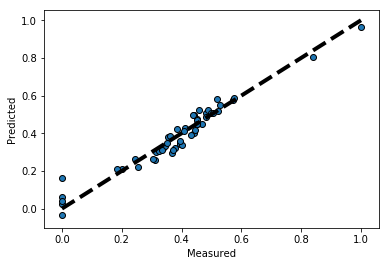

In [68]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Multiplicative Model

In [69]:
df_camaccess = pd.read_csv("camaccess.csv")

In [70]:
df_camaccess.info()
df_camaccess.shape
df_camaccess.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"1,890,289.69","1,867,964.06","2,918.62","4,232,288.26","2,364,324.21",5.57,2.49,1.27,...,"7,947,203.35","2,517,944.39","3,720,305.73","192,042.74","288,064.10",48.47,"1,136.76",14.02,0.25,0.55
std,15.44,15.44,"882,742.74","873,938.61","1,525.09","2,151,578.69","1,308,609.03",0.91,0.54,0.68,...,"4,051,771.35","1,241,413.72","3,512,725.33","357,536.45","517,190.32",7.80,176.96,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"1,629,776.00","1,603,351.00","2,167.00","3,403,457.00","1,745,374.00",5.46,2.36,1.02,...,"4,787,285.21","1,592,336.12","2,146,059.69",0.00,0.00,46.93,"1,065.86",6.00,0.00,0.00
50%,26.00,53.00,"1,949,101.00","1,923,468.00","2,915.00","4,152,990.00","2,280,704.00",5.67,2.55,1.18,...,"9,670,232.97","3,076,240.41","2,559,407.38",0.00,0.00,48.79,"1,194.00",13.00,0.00,0.00
75%,39.00,66.00,"2,287,578.00","2,265,046.00","3,941.00","5,372,808.00","3,078,954.00",5.83,2.71,1.44,...,"11,075,114.41","3,359,844.47","3,400,723.06","305,833.06","412,464.52",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"4,872,689.97","4,823,257.47","7,307.00","10,992,699.00","6,169,441.53",8.00,4.00,5.66,...,"11,994,452.49","3,627,109.84","15,712,724.16","1,328,791.94","1,993,187.90",59.99,"1,242.00",30.00,3.00,7.00


In [71]:
df_camaccess = df_camaccess.loc[:, ~df_camaccess.columns.str.contains('^Unnamed')]
df_camaccess.head()
df_camaccess.shape
df_camaccess = df_camaccess.dropna()
df_camaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"540,907.28","224,934.98","2,237,080.25",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

In [72]:
df_camaccess=df_camaccess[df_camaccess['gmv']!=0]

In [73]:
df_camaccess.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

In [74]:
df_camaccess=df_camaccess.replace(0, 0.001)

In [75]:
df_camaccess['Week'] = np.log(df_camaccess['Week'])
df_camaccess['gmv']=np.log(df_camaccess['gmv'])
df_camaccess['list_price']=np.log(df_camaccess['list_price'])
df_camaccess['product_mrp']=np.log(df_camaccess['product_mrp'])
df_camaccess['discount']=np.log(df_camaccess['discount'])
df_camaccess['units']=np.log(df_camaccess['units'])
df_camaccess['sla']=np.log(df_camaccess['sla'])
df_camaccess['Total Investment']=np.log(df_camaccess['Total Investment'])
df_camaccess['product_procurement_sla']=np.log(df_camaccess['product_procurement_sla'])
df_camaccess['% discount wrt list price']=np.log(df_camaccess['% discount wrt list price'])
df_camaccess['TV']=np.log(df_camaccess['TV'])
df_camaccess['Digital']=np.log(df_camaccess['Digital'])
df_camaccess['Sponsorship']=np.log(df_camaccess['Sponsorship'])
df_camaccess['Content Marketing']=np.log(df_camaccess['Content Marketing'])
df_camaccess['Online marketing']=np.log(df_camaccess['Online marketing'])
df_camaccess[' Affiliates']=np.log(df_camaccess[' Affiliates'])
df_camaccess['Radio']=np.log(df_camaccess['Radio'])
df_camaccess['Other']=np.log(df_camaccess['Other'])
df_camaccess['SEM']=np.log(df_camaccess['SEM'])
df_camaccess['SEM']=np.log(df_camaccess['SEM'])
df_camaccess['NPS']=np.log(df_camaccess['NPS'])
df_camaccess['Stock_Index']=np.log(df_camaccess['Stock_Index'])
df_camaccess['pay_date_diff']=np.log(df_camaccess['pay_date_diff'])

In [76]:
df_camaccess.head()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,3.30,7.34,7.34,0.69,7.99,7.25,1.50,1.10,-0.09,15.20,...,12.65,11.76,2.64,-6.91,-6.91,4.00,7.07,2.30,1.00,0.00
1,3.33,14.03,14.02,7.31,14.64,13.88,1.76,0.93,-0.14,15.84,...,13.29,12.40,2.68,-6.91,-6.91,4.00,7.07,1.10,0.00,0.00
2,3.37,14.23,14.22,7.49,14.87,14.14,1.75,0.95,-0.08,15.94,...,13.39,12.50,2.69,-6.91,-6.91,4.00,7.07,2.89,0.00,2.00
3,3.40,14.21,14.20,7.52,14.88,14.17,1.76,0.97,-0.02,15.94,...,13.39,12.50,2.69,-6.91,-6.91,4.00,7.07,3.22,0.00,0.00
4,3.43,13.79,13.78,7.09,14.44,13.71,1.78,0.96,-0.07,15.80,...,13.20,12.32,2.68,-6.91,-6.91,4.03,7.08,2.56,1.00,0.00


<Figure size 1440x1080 with 0 Axes>

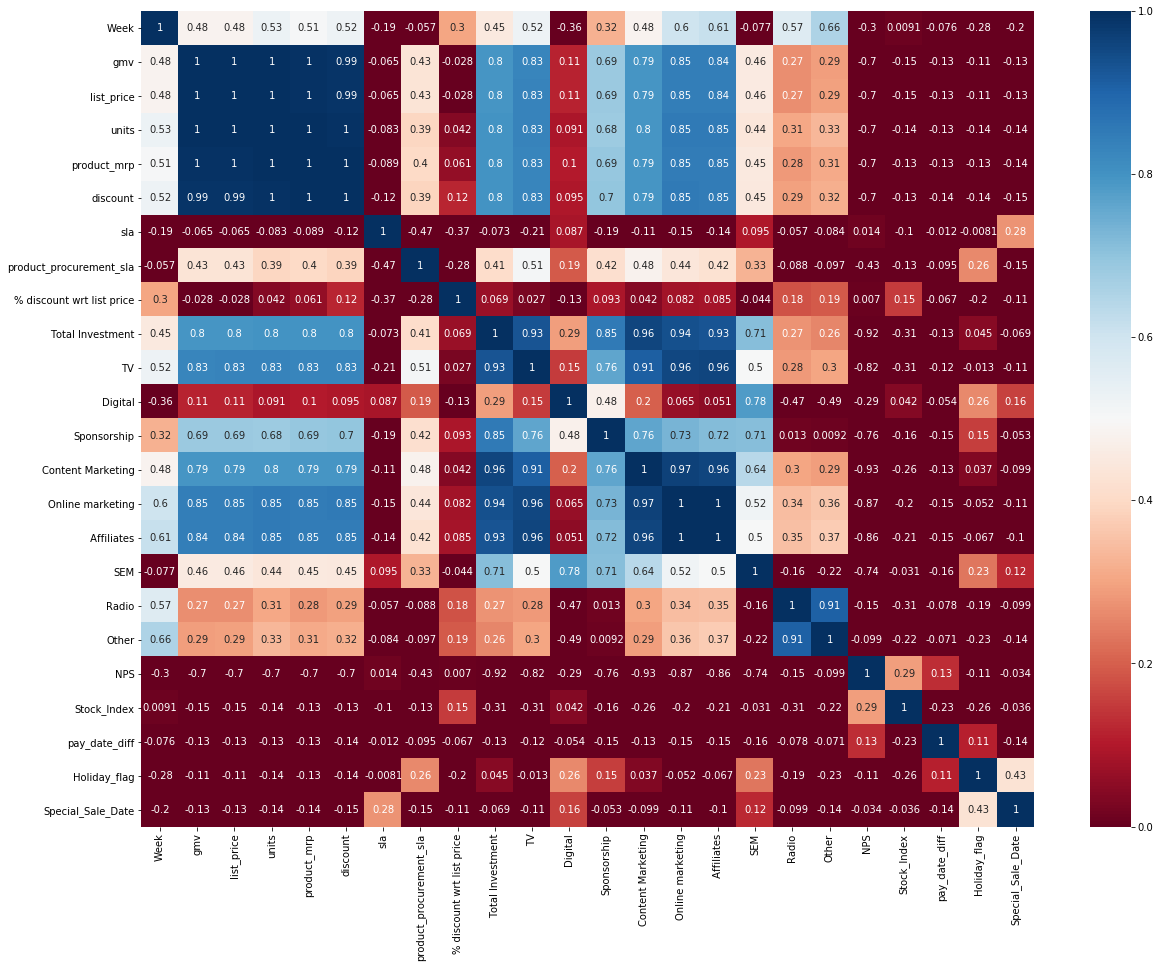

In [77]:
plt.figure(figsize=(20,15))
sns.heatmap(df_camaccess.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [78]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [79]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_camaccess.columns)
##num_vars.remove('gmv')
num_vars
df_camaccess[num_vars] = scaler.fit_transform(df_camaccess[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [80]:
df_camaccess.shape

(52, 24)

In [81]:
df_camaccess.head()
df_camaccess.describe()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0.00,0.17,0.17,0.08,0.11,0.15,0.00,0.79,0.30,0.13,...,0.30,0.27,0.00,0.00,0.00,0.69,0.73,0.89,0.33,0.00
1,0.03,0.86,0.86,0.82,0.83,0.82,0.45,0.67,0.28,0.32,...,0.43,0.41,0.26,0.00,0.00,0.69,0.73,0.78,0.00,0.00
2,0.07,0.88,0.88,0.84,0.85,0.85,0.42,0.68,0.30,0.35,...,0.44,0.44,0.30,0.00,0.00,0.69,0.73,0.95,0.00,0.29
3,0.10,0.88,0.88,0.85,0.86,0.85,0.45,0.70,0.32,0.35,...,0.44,0.44,0.30,0.00,0.00,0.69,0.73,0.98,0.00,0.00
4,0.13,0.83,0.83,0.80,0.81,0.80,0.48,0.69,0.31,0.30,...,0.41,0.40,0.26,0.00,0.00,0.78,0.77,0.92,0.33,0.00


,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,...,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,0.59,0.85,0.84,0.83,0.84,0.84,0.40,0.66,0.41,0.69,...,0.85,0.85,0.38,0.34,0.39,0.35,0.64,0.84,0.08,0.08
std,0.29,0.22,0.22,0.24,0.23,0.22,0.14,0.15,0.12,0.24,...,0.26,0.26,0.23,0.46,0.46,0.25,0.34,0.26,0.20,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.38,0.89,0.89,0.86,0.87,0.87,0.35,0.63,0.34,0.66,...,0.90,0.89,0.26,0.00,0.00,0.19,0.36,0.84,0.00,0.00
50%,0.64,0.91,0.91,0.90,0.90,0.90,0.40,0.68,0.40,0.76,...,0.96,0.97,0.32,0.00,0.00,0.32,0.80,0.91,0.00,0.00
75%,0.84,0.92,0.92,0.93,0.92,0.93,0.45,0.72,0.47,0.84,...,0.98,0.98,0.43,0.93,0.93,0.43,0.92,0.97,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [82]:
y_train = df_camaccess.pop('gmv')
X_train = df_camaccess

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                        0.05
Week                         0.00
list_price                   0.50
units                        0.00
product_mrp                  0.04
discount                     0.46
sla                          0.00
product_procurement_sla      0.00
% discount wrt list price   -0.13
Total Investment             0.00
TV                          -0.00
Digital                      0.00
Sponsorship                 -0.00
Content Marketing           -0.00
Online marketing             0.01
 Affiliates                 -0.01
SEM                         -0.00
Radio                        0.00
Other                       -0.00
NPS                         -0.00
Stock_Index                  0.00
pay_date_diff                0.00
Holiday_flag                -0.00
Special_Sale_Date           -0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.716e+06
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.54e-83
Time:                        22:10:23   Log-Likelihood:                 370.79
No. Observations:                  52   AIC:                            -695.6
Df Residuals:                      29   BIC:                            -650.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0481      0.003     15.490      0.000       0.042       0.055
Week                          0.0006      0.000      1.651      0.110      -0.000       0.001
list_price                    0.5029      0.032     15.963      0.000       0.439       0.567
units                         0.0042      0.008      0.536      0.596      -0.012       0.020
product_mrp                   0.0424      0.059      0.722      0.476      -0.078       0.163
discount                      0.4563      0.032     14.416      0.000       0.392       0.521
sla                           0.0014      0.001      2.537      0.017       0.000       0.003
product_procurement_sla       0.0025      0.001      2.507      0.018       0.000       0.005
% discount wrt list price    -0.1269      0.002    -75.725      0.000      -0.130      -0.123
Total Investment              0.0010      0.002      0.433      0.668      -0.004       0.006
TV                           -0.0007      0.002     -0.368      0.716      -0.005       0.003
Digital                       0.0022      0.001      2.098      0.045     5.6e-05       0.004
Sponsorship                  -0.0004      0.001     -0.460      0.649      -0.002       0.001
Content Marketing            -0.0035      0.003     -1.309      0.201      -0.009       0.002
Online marketing              0.0114      0.018      0.633      0.531      -0.025       0.048
 Affiliates                  -0.0094      0.016     -0.609      0.547      -0.041       0.022
SEM                          -0.0032      0.001     -2.306      0.028      -0.006      -0.000
Radio                      4.777e-06      0.000      0.021      0.984      -0.000       0.000
Other                        -0.0001      0.000     -0.532      0.599      -0.001       0.000
NPS                          -0.0025      0.001     -3.241      0.003      -0.004      -0.001
Stock_Index                   0.0002      0.000      0.962      0.344      -0.000       0.001
pay_date_diff                 0.0002      0.000      1.083      0.288      -0.000       0.001
Holiday_flag                 -0.0001      0.000     -0.411      0.684      -0.001       0.001
Special_Sale_Date         -4.397e-05      0.000     -0.167      0.868      -0.001       0.000
==============================================================================
Omnibus:                        1.171   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.472
Skew:                           0.081   Prob(JB):                        0.790
Kurtosis:                       3.438   Cond. No.                     4.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [83]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,discount,"2,350,634.63"
3,product_mrp,"140,588.19"
1,list_price,"63,283.19"
13,Online marketing,"16,442.39"
14,Affiliates,"12,777.68"
7,% discount wrt list price,"7,155.90"
2,units,"2,750.05"
12,Content Marketing,299.34
8,Total Investment,254.32
9,TV,162.34


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 3),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('% discount wrt list price', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', False, 2),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', False, 9),
 ('Other', False, 7),
 ('NPS', True, 1),
 ('Stock_Index', False, 4),
 ('pay_date_diff', False, 5),
 ('Holiday_flag', False, 6),
 ('Special_Sale_Date', False, 8)]

Index(['list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'NPS'],
      dtype='object')

Index(['Week', 'Sponsorship', 'Radio', 'Other', 'Stock_Index', 'pay_date_diff',
       'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.738e+06
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          8.05e-107
Time:                        22:10:24   Log-Likelihood:                 364.85
No. Observations:                  52   AIC:                            -699.7
Df Residuals:                      37   BIC:                            -670.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,list_price,inf
4,discount,inf
7,% discount wrt list price,inf
3,product_mrp,"111,051.70"
12,Online marketing,"5,670.94"
13,Affiliates,"5,008.30"
2,units,"1,573.25"
9,TV,124.36
8,Total Investment,100.89
11,Content Marketing,89.72


In [87]:
# Drop variable
X_train_new = X_train_rfe.drop(["list_price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.738e+06
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          8.05e-107
Time:                        22:10:24   Log-Likelihood:                 364.85
No. Observations:                  52   AIC:                            -699.7
Df Residuals:                      37   BIC:                            -670.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,discount,"124,344.65"
2,product_mrp,"111,051.70"
11,Online marketing,"5,670.94"
12,Affiliates,"5,008.30"
1,units,"1,573.25"
0,const,490.12
6,% discount wrt list price,464.82
8,TV,124.36
7,Total Investment,100.89
10,Content Marketing,89.72


In [88]:
# Drop variable
X_train_new = X_train_new.drop(["discount"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.347e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.74e-92
Time:                        22:10:24   Log-Likelihood:                 307.58
No. Observations:                  52   AIC:                            -587.2
Df Residuals:                      38   BIC:                            -559.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
10,Online marketing,"4,016.04"
11,Affiliates,"3,692.49"
1,units,"1,289.91"
2,product_mrp,"1,277.51"
0,const,488.15
7,TV,121.44
6,Total Investment,100.60
9,Content Marketing,81.73
12,SEM,31.12
13,NPS,17.49


In [89]:
# Drop variable
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.525e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.07e-91
Time:                        22:10:24   Log-Likelihood:                 297.50
No. Observations:                  52   AIC:                            -569.0
Df Residuals:                      39   BIC:                            -543.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,units,"1,256.12"
2,product_mrp,"1,231.33"
0,const,397.41
10,Affiliates,101.22
7,TV,87.55
6,Total Investment,80.13
9,Content Marketing,69.36
11,SEM,30.98
12,NPS,17.36
8,Digital,13.69


In [90]:
# Drop variable
X_train_new = X_train_new.drop(["product_mrp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4846.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.61e-59
Time:                        22:10:25   Log-Likelihood:                 191.82
No. Observations:                  52   AIC:                            -359.6
Df Residuals:                      40   BIC:                            -336.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,370.19
9,Affiliates,99.70
6,TV,86.60
5,Total Investment,79.88
8,Content Marketing,65.31
10,SEM,30.96
7,Digital,13.67
11,NPS,12.97
3,product_procurement_sla,5.05
1,units,4.27


In [91]:
# Drop variable
X_train_new = X_train_new.drop([" Affiliates"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5424.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.16e-60
Time:                        22:10:25   Log-Likelihood:                 191.63
No. Observations:                  52   AIC:                            -361.3
Df Residuals:                      41   BIC:                            -339.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,369.83
5,Total Investment,49.61
6,TV,23.69
8,Content Marketing,20.62
9,SEM,18.95
10,NPS,12.23
7,Digital,6.54
1,units,3.64
3,product_procurement_sla,3.37
2,sla,2.56


In [92]:
# Drop variable
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6164.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.48e-62
Time:                        22:10:25   Log-Likelihood:                 191.58
No. Observations:                  52   AIC:                            -363.2
Df Residuals:                      42   BIC:                            -343.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,369.56
7,Content Marketing,16.14
8,SEM,12.38
9,NPS,12.21
5,TV,9.57
6,Digital,5.87
1,units,3.64
3,product_procurement_sla,2.90
2,sla,2.56
4,% discount wrt list price,2.01


In [93]:
# Drop variable
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4922.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.41e-61
Time:                        22:10:25   Log-Likelihood:                 182.07
No. Observations:                  52   AIC:                            -346.1
Df Residuals:                      43   BIC:                            -328.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,322.67
7,SEM,11.93
8,NPS,9.15
5,TV,6.88
6,Digital,5.60
1,units,3.55
3,product_procurement_sla,2.87
2,sla,2.55
4,% discount wrt list price,1.98


In [94]:
# Drop variable
X_train_new = X_train_new.drop(["SEM"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5566.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.17e-62
Time:                        22:10:25   Log-Likelihood:                 181.20
No. Observations:                  52   AIC:                            -346.4
Df Residuals:                      44   BIC:                            -330.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,304.97
5,TV,6.19
7,NPS,3.81
1,units,3.43
3,product_procurement_sla,2.82
2,sla,2.49
4,% discount wrt list price,1.90
6,Digital,1.16


In [95]:
# Drop variable
X_train_new = X_train_new.drop(["TV"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6216.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.05e-64
Time:                        22:10:25   Log-Likelihood:                 179.48
No. Observations:                  52   AIC:                            -345.0
Df Residuals:                      45   BIC:                            -331.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,250.69
3,product_procurement_sla,2.81
6,NPS,2.36
2,sla,2.35
1,units,2.07
4,% discount wrt list price,1.89
5,Digital,1.16


In [96]:
# Drop variable
X_train_new = X_train_new.drop(["NPS"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7608.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.90e-66
Time:                        22:10:26   Log-Likelihood:                 179.42
No. Observations:                  52   AIC:                            -346.8
Df Residuals:                      46   BIC:                            -335.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,156.14
3,product_procurement_sla,2.56
2,sla,2.22
4,% discount wrt list price,1.83
1,units,1.33
5,Digital,1.09


In [97]:
# Drop variable
X_train_new = X_train_new.drop(["sla"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9268.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.98e-67
Time:                        22:10:26   Log-Likelihood:                 178.19
No. Observations:                  52   AIC:                            -346.4
Df Residuals:                      47   BIC:                            -336.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,46.06
2,product_procurement_sla,1.34
1,units,1.22
3,% discount wrt list price,1.12
4,Digital,1.05


In [98]:
X_train_new.columns

Index(['const', 'units', 'product_procurement_sla',
       '% discount wrt list price', 'Digital'],
      dtype='object')

In [99]:
X_train_new=X_train_new.drop('const',axis=1)

In [100]:
X_train_new.columns

Index(['units', 'product_procurement_sla', '% discount wrt list price',
       'Digital'],
      dtype='object')

In [101]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

[' Affiliates', 'SEM', 'Holiday_flag', 'product_mrp', 'Week', 'Total Investment', 'Online marketing', 'discount', 'NPS', 'Content Marketing', 'list_price', 'Special_Sale_Date', 'sla', 'Other', 'pay_date_diff', 'TV', 'Sponsorship', 'gmv', 'Stock_Index', 'Radio']


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([ 0.99675303,  0.99761329,  0.9989432 ,  0.99697313,  0.35944782,
        0.98330444, -0.29587301,  0.99095057,  0.71120628,  0.8470878 ])

In [103]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [104]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00015341427744465
r_square_value : 0.9968574154685541


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

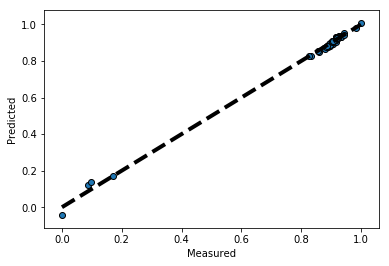

In [105]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Distributed Lag Model

In [106]:
lag_camaccess = pd.read_csv("camaccess.csv")
lag_camaccess = lag_camaccess.loc[:, ~lag_camaccess.columns.str.contains('^Unnamed')]

In [107]:
lag_vars = ['gmv','list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date']

camaccess_temp1 = lag_camaccess[lag_vars].shift(1)
camaccess_temp2 = lag_camaccess[lag_vars].shift(2)
camaccess_temp1.columns = ['gmv_lag_1','list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1', 'discount_lag_1', 'sla_lag_1',
       'product_procurement_sla_lag_1', '% discount wrt list price_lag_1',
       'Total Investment_lag_1', 'TV_lag_1', 'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1', 'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1',
       'Stock_Index_lag_1', 'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1']
camaccess_temp2.columns = ['gmv_lag_2','list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2', 'discount_lag_2', 'sla_lag_2',
       'product_procurement_sla_lag_2', '% discount wrt list price_lag_2',
       'Total Investment_lag_2', 'TV_lag_2', 'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2', 'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2',
       'Stock_Index_lag_2', 'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2']

camaccess_temp1.head()
camaccess_temp2.head()

,gmv_lag_1,list_price_lag_1,units_lag_1,product_mrp_lag_1,discount_lag_1,sla_lag_1,product_procurement_sla_lag_1,% discount wrt list price_lag_1,Total Investment_lag_1,TV_lag_1,...,Online marketing_lag_1,Affiliates_lag_1,SEM_lag_1,Radio_lag_1,Other_lag_1,NPS_lag_1,Stock_Index_lag_1,pay_date_diff_lag_1,Holiday_flag_lag_1,Special_Sale_Date_lag_1
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63","50,463.68",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
2,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30","95,880.98",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
3,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23","105,973.72",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00
4,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23","105,973.72",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25.00,0.00,0.00


,gmv_lag_2,list_price_lag_2,units_lag_2,product_mrp_lag_2,discount_lag_2,sla_lag_2,product_procurement_sla_lag_2,% discount wrt list price_lag_2,Total Investment_lag_2,TV_lag_2,...,Online marketing_lag_2,Affiliates_lag_2,SEM_lag_2,Radio_lag_2,Other_lag_2,NPS_lag_2,Stock_Index_lag_2,pay_date_diff_lag_2,Holiday_flag_lag_2,Special_Sale_Date_lag_2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63","50,463.68",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
3,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30","95,880.98",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
4,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23","105,973.72",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00


In [108]:
camera_lag = pd.concat([lag_camaccess,camaccess_temp1],axis=1)
camera_lag.head()
camera_lag.shape
camera_lag = camera_lag[pd.notnull(camera_lag['product_mrp_lag_1'])]
camera_lag.shape
camera_lag = pd.concat([lag_camaccess,camaccess_temp2],axis=1)
camera_lag.head()
camera_lag.shape
camera_lag = camera_lag[pd.notnull(camera_lag['product_mrp_lag_2'])]
camera_lag.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing_lag_1,Affiliates_lag_1,SEM_lag_1,Radio_lag_1,Other_lag_1,NPS_lag_1,Stock_Index_lag_1,pay_date_diff_lag_1,Holiday_flag_lag_1,Special_Sale_Date_lag_1
0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00
4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",25.00,0.00,0.00


(53, 47)

(52, 47)

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing_lag_2,Affiliates_lag_2,SEM_lag_2,Radio_lag_2,Other_lag_2,NPS_lag_2,Stock_Index_lag_2,pay_date_diff_lag_2,Holiday_flag_lag_2,Special_Sale_Date_lag_2
0,27,"1,544.00","1,544.00",2.00,"2,950.00","1,406.00",4.50,3.00,0.91,"3,998,509.63",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,"1,237,541.00","1,224,345.00","1,496.00","2,289,918.00","1,065,573.00",5.83,2.53,0.87,"7,597,168.30",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,29,"1,519,243.00","1,500,508.00","1,794.00","2,879,899.00","1,379,391.00",5.75,2.58,0.92,"8,396,870.23",...,"311,053.93","128,251.59","1,177,327.80",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
3,30,"1,479,823.00","1,462,246.00","1,850.00","2,890,694.00","1,428,448.00",5.83,2.64,0.98,"8,396,870.23",...,"591,002.46","243,678.02","2,236,922.83",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
4,31,"978,782.00","965,706.00","1,198.00","1,867,771.00","902,065.00",5.92,2.61,0.93,"7,272,204.23",...,"653,213.25","269,328.34","2,472,388.39",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00


(53, 47)

(51, 47)

In [109]:
camera_lag.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_lag_2', 'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2', 'product_procurement_sla_lag_2',
       '% discount wrt list price_lag_2', 'Total Investment_lag_2', 'TV_lag_2',
       'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2',
       'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2', 'Stock_Index_lag_2',
       'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2'],
      dtype='object')

In [110]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_lag_2', 'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2', 'product_procurement_sla_lag_2',
       '% discount wrt list price_lag_2', 'Total Investment_lag_2', 'TV_lag_2',
       'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2',
       'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2', 'Stock_Index_lag_2',
       'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2']
camera_lag_scaled = camera_lag
camera_lag_scaled[num_vars] = scaler.fit_transform(camera_lag_scaled[num_vars])

In [111]:
# Running RFE with the output number of the variable equal to 10 
y_c_lag_train = camera_lag_scaled['gmv']
X_c_lag_train = camera_lag_scaled.drop(['gmv'],axis=1)
lm = LinearRegression()
lm.fit(X_c_lag_train, y_c_lag_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_c_lag_train, y_c_lag_train)
list(zip(X_c_lag_train.columns,rfe.support_,rfe.ranking_))
col = X_c_lag_train.columns[rfe.support_]
col
X_c_lag_train.columns[~rfe.support_] # shows that all columns are taken into consideration

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[('Week', False, 27),
 ('list_price', True, 1),
 ('units', False, 8),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', False, 20),
 ('product_procurement_sla', False, 24),
 ('% discount wrt list price', False, 25),
 ('Total Investment', False, 15),
 ('TV', False, 37),
 ('Digital', False, 23),
 ('Sponsorship', False, 12),
 ('Content Marketing', False, 26),
 ('Online marketing', False, 14),
 (' Affiliates', False, 11),
 ('SEM', False, 13),
 ('Radio', False, 16),
 ('Other', False, 28),
 ('NPS', False, 10),
 ('Stock_Index', False, 9),
 ('pay_date_diff', False, 35),
 ('Holiday_flag', False, 32),
 ('Special_Sale_Date', False, 36),
 ('gmv_lag_2', True, 1),
 ('list_price_lag_2', True, 1),
 ('units_lag_2', False, 6),
 ('product_mrp_lag_2', False, 33),
 ('discount_lag_2', False, 7),
 ('sla_lag_2', False, 18),
 ('product_procurement_sla_lag_2', False, 21),
 ('% discount wrt list price_lag_2', False, 22),
 ('Total Investment_lag_2', True, 1),
 ('TV_lag_2', False, 2),
 ('Digital_lag_2', 

Index(['list_price', 'product_mrp', 'discount', 'gmv_lag_2',
       'list_price_lag_2', 'Total Investment_lag_2', 'Digital_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2'],
      dtype='object')

Index(['Week', 'units', 'sla', 'product_procurement_sla',
       '% discount wrt list price', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'NPS', 'Stock_Index', 'pay_date_diff',
       'Holiday_flag', 'Special_Sale_Date', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2', 'product_procurement_sla_lag_2',
       '% discount wrt list price_lag_2', 'TV_lag_2', 'Sponsorship_lag_2',
       'Content Marketing_lag_2', 'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2',
       'Stock_Index_lag_2', 'pay_date_diff_lag_2', 'Holiday_flag_lag_2',
       'Special_Sale_Date_lag_2'],
      dtype='object')

In [112]:
### Building model using statsmodel, for the detailed statistics

# Creating X_test dataframe with RFE selected variables
X_c_lag_train_rfe = X_c_lag_train[col]
#X_c_lag_train_rfe = X_c_lag_train[col]

# Adding a constant variable
import statsmodels.api as sm
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

# Running the linear model
lm = sm.OLS(y_c_lag_train, X_c_lag_train_lm).fit()
# Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_lm.values, i) for i in range(X_c_lag_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.604e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.99e-90
Time:                        22:10:30   Log-Likelihood:                 283.96
No. Observations:                  51   AIC:                            -547.9
Df Residuals:                      41   BIC:                            -528.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
1,list_price,inf
2,product_mrp,inf
3,discount,inf
4,gmv_lag_2,"37,649.33"
5,list_price_lag_2,"37,589.96"
8,Online marketing_lag_2,236.54
9,Affiliates_lag_2,188.43
10,SEM_lag_2,114.76
7,Digital_lag_2,79.47
0,const,9.09


In [113]:
# 'list_price' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["list_price"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.604e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.99e-90
Time:                        22:10:30   Log-Likelihood:                 283.96
No. Observations:                  51   AIC:                            -547.9
Df Residuals:                      41   BIC:                            -528.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,gmv_lag_2,"213,385.26"
3,list_price_lag_2,"212,658.18"
6,Online marketing_lag_2,"1,180.87"
7,Affiliates_lag_2,985.69
0,product_mrp,301.83
1,discount,268.86
8,SEM_lag_2,247.81
5,Digital_lag_2,136.71
4,Total Investment_lag_2,32.45


In [114]:
# 'gmv_lag_2' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["gmv_lag_2"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.818e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.46e-93
Time:                        22:10:30   Log-Likelihood:                 283.54
No. Observations:                  51   AIC:                            -549.1
Df Residuals:                      42   BIC:                            -531.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
5,Online marketing_lag_2,"1,157.92"
6,Affiliates_lag_2,954.17
0,product_mrp,292.83
1,discount,259.13
7,SEM_lag_2,247.12
4,Digital_lag_2,136.66
3,Total Investment_lag_2,32.25
2,list_price_lag_2,10.91


In [115]:
# 'Online marketing_lag_2' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["Online marketing_lag_2"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.079e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.24e-95
Time:                        22:10:30   Log-Likelihood:                 282.95
No. Observations:                  51   AIC:                            -549.9
Df Residuals:                      43   BIC:                            -534.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
0,product_mrp,291.87
1,discount,258.56
6,SEM_lag_2,91.72
4,Digital_lag_2,56.93
3,Total Investment_lag_2,32.25
5,Affiliates_lag_2,25.31
2,list_price_lag_2,10.90


In [116]:
# 'product_mrp' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["product_mrp"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     66.92
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.72e-20
Time:                        22:10:31   Log-Likelihood:                 76.034
No. Observations:                  51   AIC:                            -138.1
Df Residuals:                      44   BIC:                            -124.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
5,SEM_lag_2,90.96
3,Digital_lag_2,55.06
2,Total Investment_lag_2,32.17
4,Affiliates_lag_2,22.87
1,list_price_lag_2,10.86
0,discount,6.76


In [117]:
# 'SEM_lag_2' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["SEM_lag_2"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     82.07
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.82e-21
Time:                        22:10:31   Log-Likelihood:                 76.017
No. Observations:                  51   AIC:                            -140.0
Df Residuals:                      45   BIC:                            -128.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

,Features,VIF
2,Total Investment_lag_2,26.25
4,Affiliates_lag_2,22.01
1,list_price_lag_2,10.75
0,discount,6.74
3,Digital_lag_2,5.84


In [118]:
# 'Total Investment_lag_2' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["Total Investment_lag_2"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.85e-22
Time:                        22:10:31   Log-Likelihood:                 75.891
No. Observations:                  51   AIC:                            -141.8
Df Residuals:                      46   BIC:                            -132.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0614      0.02

,Features,VIF
3,Affiliates_lag_2,12.30
1,list_price_lag_2,10.75
0,discount,6.54
2,Digital_lag_2,1.90


In [119]:
# 'Affiliates_lag_2' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop([" Affiliates_lag_2"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.01e-22
Time:                        22:10:31   Log-Likelihood:                 73.759
No. Observations:                  51   AIC:                            -139.5
Df Residuals:                      47   BIC:                            -131.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0678      0.022  

,Features,VIF
1,list_price_lag_2,6.29
0,discount,5.00
2,Digital_lag_2,1.88


In [120]:
# 'list_price_lag_2' is having high vif 

X_c_lag_train_rfe= X_c_lag_train_rfe.drop(["list_price_lag_2"],axis=1)
X_c_lag_train_lm = sm.add_constant(X_c_lag_train_rfe)

lm = sm.OLS(y_c_lag_train,X_c_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_c_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_c_lag_train_rfe.values, i) for i in range(X_c_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     198.2
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.35e-24
Time:                        22:10:31   Log-Likelihood:                 73.752
No. Observations:                  51   AIC:                            -141.5
Df Residuals:                      48   BIC:                            -135.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0665      0.019      3.449

,Features,VIF
0,discount,1.48
1,Digital_lag_2,1.48


In [121]:
X_c_lag_train_rfe.columns

Index(['discount', 'Digital_lag_2'], dtype='object')

In [122]:
drop_columns_list = list(set(num_vars) - set(list(X_c_lag_train_rfe.columns)))
print(drop_columns_list)

['Radio_lag_2', 'Content Marketing_lag_2', 'Digital', 'pay_date_diff_lag_2', 'Week', 'TV_lag_2', 'product_mrp_lag_2', 'units', 'NPS', ' Affiliates_lag_2', 'list_price_lag_2', 'Special_Sale_Date', 'sla', 'Other', 'pay_date_diff', 'product_procurement_sla_lag_2', 'Online marketing_lag_2', 'SEM_lag_2', 'TV', 'Sponsorship', 'gmv', '% discount wrt list price_lag_2', 'Stock_Index', 'Sponsorship_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2', ' Affiliates', 'SEM', 'Holiday_flag', 'product_mrp', 'Total Investment', 'Online marketing', 'Other_lag_2', 'gmv_lag_2', 'discount_lag_2', '% discount wrt list price', 'sla_lag_2', 'units_lag_2', 'Stock_Index_lag_2', 'Content Marketing', 'list_price', 'product_procurement_sla', 'Total Investment_lag_2', 'NPS_lag_2', 'Radio']


In [123]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_c_lag_train_rfe, y_c_lag_train, scoring='r2', cv=folds)
scores   

array([ 0.9320617 ,  0.94078714,  0.11307687,  0.23782947, -1.89875051,
        0.92949267,  0.94378747,  0.73295146,  0.87352581,  0.84683747])

In [124]:
y_pred = cross_val_predict(lm, X_c_lag_train_rfe, y_c_lag_train, cv=folds)

In [125]:
mse = mean_squared_error(y_c_lag_train, y_pred)
r_squared = r2_score(y_c_lag_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.003768731529399849
r_square_value : 0.8746281063024163


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

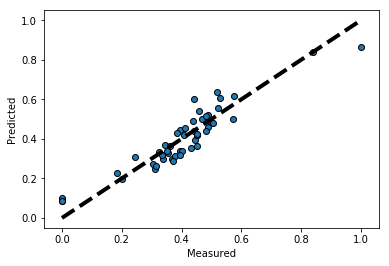

In [126]:
fig, ax = plt.subplots()
ax.scatter(y_c_lag_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_c_lag_train.min(), y_c_lag_train.max()], [y_c_lag_train.min(), y_c_lag_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()